# TO HALL OF FAME OR NOT TO HALL OF FAME...

March 09,2023


Alan Mondragon alan.mondra95@gmail.com Joseph Lee jlee932cp@gmail.com

#Background:

Our goal for this analysis is to find key characteristics that determine if a NBA player will make the Hall of Fame or not. The reason for our analysis is due to some historically great players being left out of the HOF. We want to know how these players stack up against other players that made the HOF with similar player profiles.

We knew that some milestones would definitely get a player inducted into the HOF, and we wanted to explore what those qualifications might be. Some of our assumptions include MVP awards, All Star game selections, and championships won.

Hypothesis: We beleive that a combination of achievements play the biggest factor in determining if a NBA player will be in the Hall of Fame (HOF).

In [ ]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
df1 = pd.read_csv('/content/NBA Hall of Famers NEW.csv')
df1.head()

,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born,Championships,MVP,PTS,FG%,FT%,REB,AST,STL,BLK,EFG%
0,Kareem Abdul-Jabbar,C,19,1,218,102,1947,6,6,38387,55.9,72.1,17440,5660,1160.0,3189.0,55.9
1,Kobe Bryant,G,18,1,198,96,1978,5,1,33643,44.7,83.7,7047,6306,1944.0,640.0,48.2
2,LeBron James,F,17,2,203,113,1984,4,4,38450,50.5,73.5,10606,10371,2180.0,1067.0,54.5
3,Tim Duncan,F,15,1,211,113,1976,5,2,26496,50.6,69.6,15091,4225,1025.0,3020.0,50.7
4,Kevin Garnett,F,15,1,211,108,1976,0,1,26071,49.7,78.9,14662,5445,1859.0,2037.0,50.1


Looking at the data types.

In [ ]:
df1.dtypes

Name                    object
position                object
All_star_selections      int64
In_Hall_of_fame          int64
height                   int64
weight                   int64
born                     int64
Championships            int64
MVP                      int64
PTS                      int64
FG%                    float64
FT%                    float64
REB                      int64
AST                      int64
STL                    float64
BLK                    float64
EFG%                   float64
dtype: object

In [ ]:
df1.columns

Index(['Name', 'position', 'All_star_selections', 'In_Hall_of_fame', 'height',
       'weight', 'born', 'Championships', 'MVP', 'PTS', 'FG%', 'FT%', 'REB',
       'AST', 'STL', 'BLK', 'EFG%'],
      dtype='object')

In [ ]:
dummy_variable_1 = pd.get_dummies(df1["position"])
dummy_variable_1.rename(columns={'C': 'Center', 'F': 'Forward', 'G': 'Guard'}, inplace=True)
dummy_variable_1.head(5)

,Center,Forward,Guard
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
df1 = pd.concat([df1, dummy_variable_1], axis=1)

In [ ]:
dummy_variable_2 = pd.get_dummies(df1["In_Hall_of_fame"])
dummy_variable_2.rename(columns={1: 'In the Hall of fame', 2: 'Active player', 0: 'Not in the HOF/ retired'}, inplace=True)
dummy_variable_2.head()

In [ ]:
df1.head()

,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born,Championships,MVP,PTS,FG%,FT%,REB,AST,STL,BLK,EFG%,Center,Forward,Guard
0,Kareem Abdul-Jabbar,C,19,1,218,102,1947,6,6,38387,55.9,72.1,17440,5660,1160.0,3189.0,55.9,1,0,0
1,Kobe Bryant,G,18,1,198,96,1978,5,1,33643,44.7,83.7,7047,6306,1944.0,640.0,48.2,0,0,1
2,LeBron James,F,17,2,203,113,1984,4,4,38450,50.5,73.5,10606,10371,2180.0,1067.0,54.5,0,1,0
3,Tim Duncan,F,15,1,211,113,1976,5,2,26496,50.6,69.6,15091,4225,1025.0,3020.0,50.7,0,1,0
4,Kevin Garnett,F,15,1,211,108,1976,0,1,26071,49.7,78.9,14662,5445,1859.0,2037.0,50.1,0,1,0


In [ ]:
df1 = df1.drop(columns=['In_Hall_of_fame', 'born','height', 'weight'])


In [ ]:
df1 = pd.concat([df1, dummy_variable_2], axis=1)

In [ ]:
df1.rename(columns = {'Not in the HOF/ retired':'Retired/Not HOF', 'All_star_selections':'All Star Selections',
                             'In the Hall of fame':'HOF'}, inplace = True)

In [ ]:
display(df1)

,Name,position,All Star Selections,Championships,MVP,PTS,FG%,FT%,REB,AST,STL,BLK,EFG%,Center,Forward,Guard,Retired/Not HOF,HOF,Active player
0,Kareem Abdul-Jabbar,C,19,6,6,38387,55.9,72.1,17440,5660,1160.0,3189.0,55.9,1,0,0,0,1,0
1,Kobe Bryant,G,18,5,1,33643,44.7,83.7,7047,6306,1944.0,640.0,48.2,0,0,1,0,1,0
2,LeBron James,F,17,4,4,38450,50.5,73.5,10606,10371,2180.0,1067.0,54.5,0,1,0,0,0,1
3,Tim Duncan,F,15,5,2,26496,50.6,69.6,15091,4225,1025.0,3020.0,50.7,0,1,0,0,1,0
4,Kevin Garnett,F,15,0,1,26071,49.7,78.9,14662,5445,1859.0,2037.0,50.1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Julius Randle,F,1,0,0,10884,47.1,74.5,5510,2119,408.0,254.0,50.9,0,1,0,0,0,1
433,Pascal Siakam,F,1,1,0,7674,48.7,77.3,2950,1577,419.0,302.0,52.6,0,1,0,0,0,1
434,DeAndre Jordan,C,1,0,0,9102,67.5,47.5,10310,963,545.0,1524.0,67.5,1,0,0,0,0,1
435,Brook Lopez,C,1,1,0,15212,49.5,79.5,5829,1326,533.0,1682.0,52.8,1,0,0,0,0,1


In [ ]:
df1.describe()

,All Star Selections,Championships,MVP,PTS,FG%,FT%,REB,AST,STL,BLK,EFG%,Center,Forward,Guard,Retired/Not HOF,HOF,Active player
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,343.000000,342.000000,319.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,3.924485,0.805492,0.157895,13275.917620,46.155149,76.639817,5286.059497,2874.354691,892.058309,574.383041,50.225392,0.173913,0.411899,0.414188,0.558352,0.295195,0.146453
std,3.493279,1.473362,0.670658,6315.415726,5.447733,7.452219,3492.666536,2063.950429,524.312735,643.643949,3.833707,0.379469,0.492741,0.493146,0.497152,0.456653,0.353965
min,1.000000,0.000000,0.000000,370.000000,4.800000,41.400000,228.000000,51.000000,12.000000,2.000000,38.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,9041.000000,43.700000,73.000000,2784.000000,1437.000000,521.500000,163.250000,47.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,12417.000000,46.200000,77.400000,4387.000000,2341.000000,804.000000,315.500000,50.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,16297.000000,49.300000,81.700000,6891.000000,3754.000000,1161.000000,751.500000,51.950000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,19.000000,11.000000,6.000000,38450.000000,67.500000,90.900000,23924.000000,15806.000000,3265.000000,3830.000000,76.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

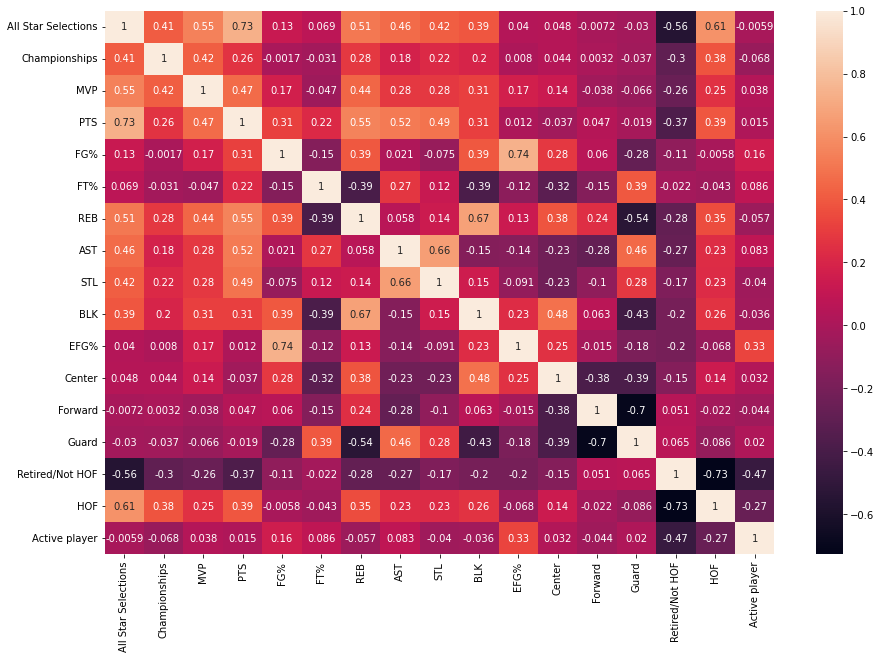

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df1[[ 'position', 'All Star Selections',
       'Championships', 'MVP', 'PTS', 'FG%', 'FT%', 'REB', 'AST', 'STL', 'BLK',
       'EFG%', 'Center', 'Forward', 'Guard', 'Retired/Not HOF',
       'HOF', 'Active player'
                ]].corr(),annot=True)

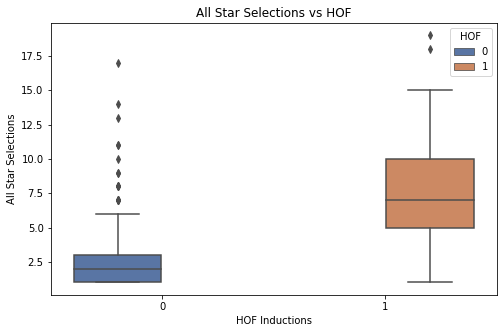

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='HOF', y='All Star Selections',
    data=df1, hue='HOF', palette='deep')
plt.xlabel("HOF Inductions")
plt.ylabel("All Star Selections")
plt.title("All Star Selections vs HOF")
plt.show()
plt.close()

First we look at the left side where there are players with 9 or more There are six NBA players who made six or more All-Star teams but have not been inducted into the Hall of Fame despite being eligible. Larry Foust has the most as his 8 All-Star appearances were not enough to get him inducted to the Hall of Fame. Five players are tied with 6 All-Star appearances but no Hall of Fame induction including Shawn Kemp, Jermaine O’Neal, and Amar’e Stoudemire. All Star selection is not only based on statistics, but is also based on popularity, as is the case with Yao Ming who made 8 All star teams and who is also in the HOF. Shawn Kemp was on fire in the league for his first 6 seasons, but fizzled out towards the end of his career, so longevity also plays a big factor towards HOF induction.

In [ ]:
px.scatter(
        df1, x="Name", y="MVP", color='HOF',
        hover_data=['Name'])

This scatter plot is misleading as it seems you can win an MVP award but not make the HOF. Everyone so far in history who has won this award at least once has made it to the HOF, with the exception being Derrick Rose. The MVP award winners not in the HOF are still active players, or have not been retired for 5 years. LeBron James, Dirk Nowitski, Stephen Curry, and Kevin Durant, to name a few.  Derrick Rose was the youngest MVP award winner at 22 yrs of age, but after his 4th season, suffered a career threatening injury that he recovered from, but was never the same player again.

In [ ]:
px.scatter(
        df1, x="Name", y="Championships", color='HOF')

From this scatter plot, almost all players with more than 4 championships are in the HOF, with the exception being Robert Horry with 7 championships. He never made an All Star team so he didn't show up in our data, but he is the lone exception. He was more of a supporting role player, and this is the same reasoning for those with at least 4 championships who did not make the HOF, excluding active players. Winning a championship is not an individual effort, and most teams were not stacked with HOF'ers on the roster. Players such as Tony Parker and Manu Ginobili were on the San Antonio Spurs championship teams, but were role players supporting the star of the team, Tim Duncan.

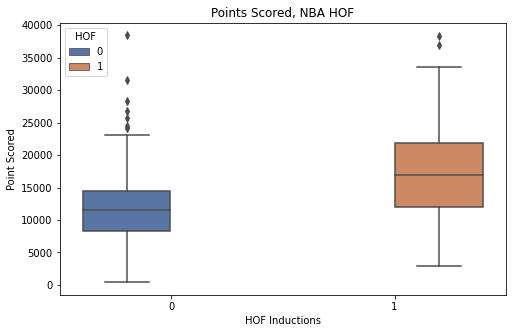

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='HOF', y='PTS',
    data=df1, hue='HOF', palette='deep')
plt.xlabel("HOF Inductions")
plt.ylabel("Point Scored")
plt.title("Points Scored, NBA HOF")
plt.show()
plt.close()

 We decided to focus on points because Assists and Rebounds are usually positionally dependent, but points need to be scored by all players regardless of position. Here we take a look at how points scored might affect HOF inductions and the means show that HOF'ers scored around 5k points more than non HOF'ers. There are some notable exceptions on the left side with LeBron James being the all time leader in points scored but still being active. Most of the outliers scoring over 20k points not in the HOF are still active.  

Not active, not in HOF, High points: Dirk N.,Vince Carter, Pau Gasol, D-Wade
Tom Chambers, Vince Carter, Antawn Jamison are among those retired with 20k+ points but not in the HOF.

Not active and in HOF low points: Bill walton, Ben Wallace, Dennis Rodman

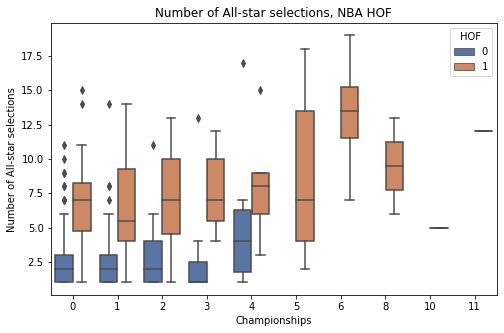

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Championships', y='All Star Selections',
    data=df1, hue='HOF', palette='deep')
plt.xlabel("Championships")
plt.ylabel("Number of All-star selections")
plt.title("Number of All-star selections, NBA HOF")
plt.show()
plt.close()

5 championships is a very good indicator of making the hall of fame, but if you dont couple that with other individual accomphlishments you could left of the HOF selection. An example of this would be Robert Horry, he has 7 championships, but no All-star selections.


HOF, Low all star count, and are a champion: Dennis Rodman,Bill Bradley, Bill Walton.Pau Gasol, Tony Parker,

Not HOF & mid to high all star count, not a champion: Vince Carter, Joe Johnson.


#Conclusion

Based on our analysis we concluded that no one key indicator gauranteed a player to be in the HOF, but a combination of accomplishments (Championships, All-Star Selections, and MVP) gave the player the best chance of making the HOF. One other factor that we wanted to note played in a player being the HOF is popularity. For example Yao Ming, with 8 All-Star Selections, no championships, and a short careers due to injuries still made the HOF due to his global impact for the game of basketball.

#END OF ANALYSIS

In [ ]:
#df1.to_csv('data.csv') CSV to google sheets

In [ ]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
#First run fare_amount through the function to return a series of the outliers.

outliers = find_outliers_IQR(df1["All Star Selections"])

print("number of outliers:" + str(len(outliers)))

print("max outlier value:"+ str(outliers.max()))

print("min outlier value:"+ str(outliers.min()))

outliers

In [ ]:
outliers = find_outliers_IQR(df1[["Championships","All Star Selections",]])
outliers

outlierdf = outliers
display(outlierdf)

In [ ]:
display(outlierdf)

In [ ]:
print(df1.loc[[6,9,13,14,15,17,19,20,22,23,24]])

In [ ]:
outliers = find_outliers_IQR(df1["MVP"])

print("number of outliers:" + str(len(outliers)))

print("max outlier value:"+ str(outliers.max()))

print("min outlier value:"+ str(outliers.min()))

outliers

In [ ]:
print(df1.loc[[121]])

In [ ]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

In [ ]:
x=df1[['All Star Selections','Championships', 'MVP', 'PTS', 'FG%', 'FT%', 'PTS','REB', 'AST']]
y=df1['HOF']

In [ ]:
reg=LinearRegression()
reg.fit(x,y)